<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2

Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Основные метрики качества классификации

[Статья](https://habrahabr.ru/company/ods/blog/328372/) на Хабре по этой теме. 

### Матрица ошибок
Существует множество различных числовых характеристик, позволяющих измерить качество бинарного классификатора. В случае двух классов возможны всего 4 исхода при классификации данного объекта. Их удобно отображать с помощью матрицы ошибок (confusion matrix).Это таблица с двумя строками и двумя столбцами, в ячейках которой указаны следующие значения:
- $TP$ = число верно классифицированных положительных примеров
- $FP$ = число отрицательных примеров, классифицированных положительно (ошибки первого рода)
- $TN$ = число верно классифицированных отрицательных примеров
- $FN$ = число положительных примеров, классифицированных отрицательно (ошибки второго рода)

<center>
<img src="../../img/contingency.png" width = "500">
</center>

Получить такую таблицу можно с помощью функции sklearn.metrics.confusion_matrix, передав ей на вход истинные и предсказанные классификатором метки.

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn import metrics

true_labels = np.array([0, 1, 0, 0, 1, 1, 1, 1])
predicted_labels = np.array([0, 1, 1, 0, 0, 1, 0, 0])

M = metrics.confusion_matrix(true_labels, predicted_labels)
M

array([[2, 1],
       [3, 2]])

### Характеристики бинарного классификатора
Основываясь на данной таблице, можно ввести несколько величин, характеризующих бинарный классификатор:
$$rec = TPR = \frac{TP}{TP + FN},\quad SPC = \frac{TN}{TN + FP},\quad prec = PPV = \frac{TP}{TP + FP},\quad FPR = 1 - SPC,$$

$$ACC = \frac{TP + TN}{TP + TN + FP + FN},\quad F1 = 2\frac{PPV\cdot TRP}{PPV + TPR}.$$

Полнота $TPR$ (True positive rate, recall, sensitivity) - доля верно классифицированных положительных примеров среди всех положительных примеров.

Специфичность $SPC$ (Specificity, true negative rate) - доля верно классифицированных отрицательных примеров среди всех отрицательных примеров.

Точность $PPV$ (Positive predictive value, precision) - доля верно классифицированных положительных примеров среди всех примеров, классифицированных положительно.

$FPR$ (False positive rate) - доля ошибочно классифицированных отрицательных примеров среди всех отрицательных примеров.

$ACC$ (Accuracy) - доля верно классифицированных примеров среди всех примеров. Основная характеристика качества классификации.

$F1$ (F1-measure) - среднее гармоническое точности и полноты. Позволяет учесть обе характеристики одновременно.





In [2]:
PPV = metrics.precision_score(true_labels, predicted_labels)
TPR = metrics.recall_score(true_labels, predicted_labels)
F1 = metrics.f1_score(true_labels, predicted_labels)
ACC = metrics.accuracy_score(true_labels, predicted_labels)
PPV, TPR, F1, ACC

(0.66666666666666663, 0.40000000000000002, 0.5, 0.5)

### ROC-кривая и AUC

Большинство бинарных классификаторов имеют вид $a(x) = \mbox{sign}(f(x, w) - w_0)$, где $w, w_0$ - параметры алгоритма. То есть сначала строится разделяющая поверхность $f(x, w) = w_0$, после чего объекты, находяющиеся по одну сторону от неё классифицируются положительно, по другую - отрицательно. 

ROC-кривая (Receiver Operating Characteristic) - это графическая характеристика качества бинарного классификатора, выражающая зависимость TPR от FPR при варьировании порога решающего правила. Она наглядно представляет, каким будет качество классификации при различных значениях $w_0$ и фиксированном значении $w$. 

ROC-кривая проходит через точки (0, 0) и (1, 1) и монотонно не убывает. Чем ближе кривая внутри квадрата $[0, 1]\times[0, 1]$ к левому верхнему углу, тем лучше. Идеальный вариант - кривая, проходящая через три точки: (0, 0), (1, 1) и (0, 1). Диагональ данного квадрата соответствует случайному гаданию. Типичная ROC-кривая для классификатора соответствует кривой B на рисунке.
<center>
<img src="../../img/ROC.jpg" width = "350">
</center>
На практике ROC-кривую всегда оценивают по независимой тестовой выборке, для того чтобы избежать переобучения.

Площадь под ROC-кривой AUC (Area Under Curve) является количественной характеристикой качества классификации, не зависящей от соотношения цен ошибок. Чем больше значение AUC, тем «лучше» модель классификации. 

### Случай дисбаланса классов

Возможные [действия](http://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/):
- Собрать больше данных, особенно примеров редкого класса (не всегда возможно)
- Использовать методы, основанные на деревьях решений  - случайный лес, градиентный бустинг над деревьями. Деревья не так подвержены проблеме дисбаланса классов
- Использовать метрики типа F1, ROC AUC и [Cohen's kappa](https://en.wikipedia.org/wiki/Cohen%27s_kappa), а не accuracy
- Использовать метрику, в которой ошибка на объекте из редкого класса входит с большим весом, чем ошибка на объекте из частого класса
- Применять [oversampling](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis) и [undersampling](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis). В первом случае в выборку добавляются представители редкого класса (сэмплируются с замещением). Во втором - представители частого класса случайным образом удаляются из выборки
- Сгенерировать искусственных представителей редкого класса. [SMOTE](http://www.jair.org/papers/paper953.html) (Synthetic Minority Over-sampling Technique). [Реализация](https://github.com/fmfn/UnbalancedDataset) на Python
- Разбить один большой класс на несколько поменьше и применить стратегии One Vs. All или One Vs. One
- Применить алгоритмы поиска выбросов или OneClass алгоритмы (например, OneClass SVM)

## Примеры

In [3]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import sys
if sys.version_info.major == 2:
    from urllib import urlopen
elif sys.version_info.major == 3:
    from urllib.request import urlopen
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc

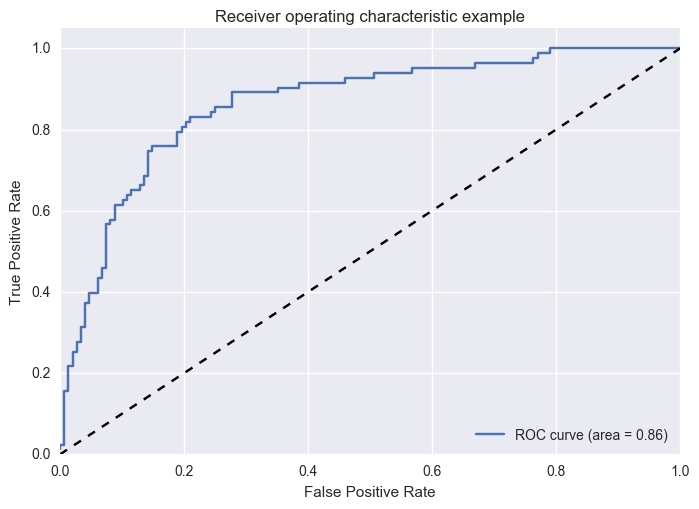

In [4]:
# Loading Pima Indians Diabetes data from UCI Machine learning repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
raw_data = urlopen(url)
data = np.loadtxt(raw_data, delimiter=",")

X = data[:, :8]
y = data[:, 8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
C = 10.0 # Regularization parameter of the error term

lin_svm = LinearSVC(C=C, dual=False).fit(X_train, y_train)
y_score = lin_svm.decision_function(X_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Указанные выше характеристики можно использовать для подбора параметров алгоритмов, например, с помощью кросс-валидации. Найдём оптимальное с точки зрения F1-меры число ближайших соседей в алгоритме kNN.

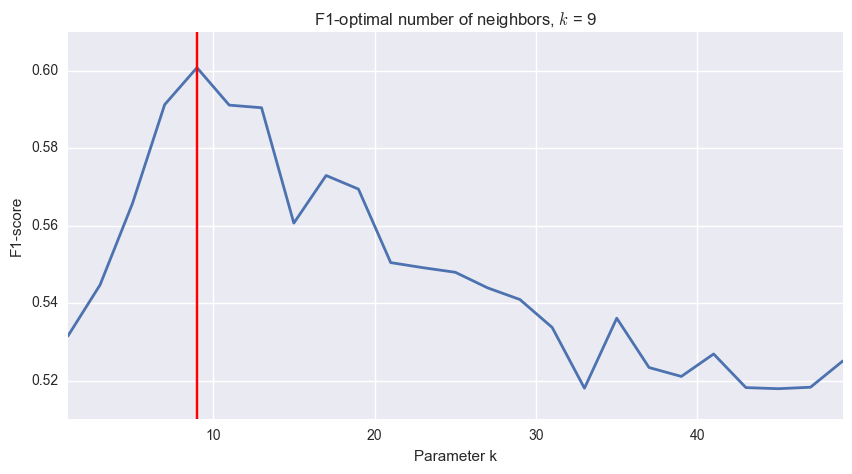

In [5]:
knn = KNeighborsClassifier()
k_s = np.arange(1, 50, 2)

scores_f1 = list()

for k in k_s:
    knn.n_neighbors = k
    scores_f1.append(np.mean(
            cross_val_score(knn, X, y, 
                            scoring = 'f1')))

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(k_s, scores_f1, linewidth = 2)
plt.axvline(k_s[np.argmax(scores_f1)], color = 'r')
plt.ylabel('F1-score')
plt.xlabel('Parameter k')
plt.xlim(1, 49)
plt.title('F1-optimal number of neighbors, $k$ = %d' % 
          k_s[np.argmax(scores_f1)])
plt.show()

### Многоклассовая классификация
В случае, когда число классов больше двух, матрица ошибок определяется аналогичным образом: на пересечении $i$-ой строки и $j$-го столбца стоит число примеров $i$-го класса, отнесённых классификатором к классу $j$. 

In [6]:
true_labels = np.array([0, 1, 2, 0, 1, 2, 0, 1, 2])
predicted_labels = np.array([0, 2, 0, 2, 1, 0, 0, 1, 2])

M = metrics.confusion_matrix(true_labels, predicted_labels)
M

array([[2, 0, 1],
       [0, 2, 1],
       [2, 0, 1]])

### One vs. All
Многоклассовая классификация может быть сведена к бинарной различными способами. Одним из них является подход One vs. All. Его суть в следующем: для каждого класса $i \in \{1, \dots, k\}$ обучим бинарный классификатор $a_i(x) = \mbox{sign}f_i(x)$ на исходной выборке с изменёнными метками (объекты $i$-го класса получают метку 1, все оставшиеся объекты - метку 0), то есть мы учим $a_i$ отличать $i$-ый класс от всех остальных. После чего итоговый классификатор строится как $a(x) = \mbox{argmax}_{i \in \{1, \dots, k\}} f_i(x)$, то есть он выдаёт класс с наибольшей оценкой $f_i(x)$. 

In [7]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
# Fitting One vs. All version of linear SVM
onevsall = OneVsRestClassifier(LinearSVC()).fit(X, y) 
metrics.accuracy_score(y, onevsall.predict(X))

0.96666666666666667

### Cсылки:

- [Статья](http://habrahabr.ru/post/228963/) "Как заставить работать бинарный классификатор чуточку лучше" на Habrahabr
- [ROC-кривая](http://www.machinelearning.ru/wiki/index.php?title=ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F)
- [Характеристики](https://en.wikipedia.org/wiki/Precision_and_recall) бинарного классификатора
- [One vs. All и One vs. One](https://en.wikipedia.org/wiki/Multiclass_classification)
- [Quora](https://www.quora.com/In-classification-how-do-you-handle-an-unbalanced-training-set) про несбаланированные выборки
- про несбаланированные выборки на [ресурсе](http://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/) Machine Learning Mastery